# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Clase 03: Trabajo con Datos Estructurados</center></h1>

Este ejercicio busca que los estudiantes usen algunas librerías para importar datos y luego aprendan algunos comandos de Pandas para analizar e inspeccionar los datos.

## 1. Datos para los ejemplos

Usaremos dos conjuntos de datos para este Notebook:
<ol>
<li>Datos de viajes en Taxi en la ciudad de Nueva York:</li>

El proyecto <i>Open Data</i> de la Ciudad de Nueva York nos da acceso a una gran cantiadad de datos del quehacer de la ciudad. En este caso usaremos el sitio con los datos de viajes en Taxi, disponibles en https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
    
En la carpeta '`data`' está disponible la base de datos de todos los viajes realizados en Mayo de 2024. El archivo se llama '`yellow_tripdata_2024-05.parquet`'.

El formato PARQUET, que es open-source desarrollado por Apache, es un formato eficiente para almacenar y leer bases de datos de gran tamaño. Para poder leer este formato desde Python, deberán instalar una nueva librería llamada ' `pyarrow` '. Para instalarla use el comando:

<code>> conda install pyarrow</code>
    
<li>Datos de casos de COVID en Chile:</li>

Durante la pandemia, el Ministerio de Ciencia y Tecnología, con el apoyo de múltiples grupos de investigación y universidades, armó un repositorio abierto de datos sobre la situación de la pandemia en Chile. Los datos a utilizar en este ejemplo provienen del repositorio GitHub **Datos-COVID19** disponible en https://github.com/MinCiencia/Datos-COVID19. Estaremos usando el 

"*Data Product 1 - Casos totales por comuna incremental: el archivo Covid-19.csv contiene las columnas 'Región', ‘Código Región’, 'Comuna', ‘Código comuna’, 'Población', múltiples columnas correspondientes a '[fecha]', y una columna 'Tasa'. Estas últimas columnas, ‘[fecha]’, contienen los 'Casos Confirmados' reportados por el Ministerio de Salud de Chile en cada una de las fechas que se indican en las respectivas columnas.*" https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1

En la carpeta '`data`' está disponible la base de datos de todos los casos confirmados hasta enero de 2023.
</ol>

## 2. Librerías

El trabajo de esta clase se centrará en el uso de NumPy y Pandas, pero necesitamos otras librerías adicionales para leer los datos y graficar información.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq

## 3. Navegación en carpetas y acceso a datos

Para improtar los archvios de datos, necesitamos identificar en qué directorio están guardados en nuestro sistema y en qué directorio estamos trabajando ("working directory").

Algunos comandos importantes:
- `%ls`: lista el contenido del directorio actual command lists all content in the current working directory.
- `%cd 'subdirectorio'`: permite cambiar la ubicación actual a 'subdirectorio'
- `%cd ..`: permite navegar hacia atrás al directorio superior del actual
- `%pwd`: entrega la ruta del directorio actual
      

In [56]:
%pwd

'c:\\Users\\esteban\\Documents\\git\\imt2200-25s2\\clases\\clase 03\\data'

In [57]:
%ls

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: 48CB-0327

 Directorio de c:\Users\esteban\Documents\git\imt2200-25s2\clases\clase 03\data

12-08-2025  14:43    <DIR>          .
12-08-2025  14:43    <DIR>          ..
12-08-2025  14:43           695.849 Covid-19.csv
12-08-2025  14:43        62.553.128 yellow_tripdata_2024-05.parquet
               2 archivos     63.248.977 bytes
               2 dirs  103.303.766.016 bytes libres


In [58]:
%cd data

[WinError 2] El sistema no puede encontrar el archivo especificado: 'data'
c:\Users\esteban\Documents\git\imt2200-25s2\clases\clase 03\data


## 4. Estudio de datos de viajes en NYC

El objetivo de este ejercicio es entender cuántos viajes ocurrieron en la ciudad de Nueva York durante mayo de 2024 y cuáles son los lugares más relevantes para tomar pasajeros.

### 4.1 Importar datos

El primer paso será importar los datos, que están en un archivo en formato Parquet, y pasarlos a un DataFrame de Pandas.

In [59]:
# leer la base parquet
trips = pq.read_table('yellow_tripdata_2024-05.parquet')

### 4.2 `pandas` y DataFrames

El método `<x>.to_pandas()` permite transformar el archivo Parquet en un DataFrame de Pandas.
Un DataFrame es una base de datos estructurada, que posee columnas y filas con la información relevante. Una referencia rápida a varias cosas que se pueden hacer con DataFrames está disponible acá: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [60]:
# transformar a dataframe de pandas
trips = trips.to_pandas()

### 4.3 Leer e inspeccionar un DataFrame

Un DataFrame de Pandas posee una serie de métodos que permiten revisar los datos contenidos en el DataFrame. Algunos de los más relevantes los vemos a continuación.

In [61]:
trips.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-05-01 00:59:15,2024-05-01 01:23:50,1.0,6.10,1.0,N,138,145,1,28.2,7.75,0.5,5.00,0.00,1.0,42.45,0.0,1.75
1,2,2024-04-30 23:58:26,2024-05-01 00:29:42,1.0,11.23,1.0,N,138,249,1,46.4,6.00,0.5,8.72,0.00,1.0,66.87,2.5,1.75
2,2,2024-05-01 00:57:17,2024-05-01 01:14:15,1.0,9.02,1.0,N,138,170,1,35.9,6.00,0.5,10.57,6.94,1.0,65.16,2.5,1.75
3,2,2024-05-01 00:24:47,2024-05-01 00:48:51,1.0,6.53,1.0,N,87,133,1,30.3,1.00,0.5,7.06,0.00,1.0,42.36,2.5,0.00
4,2,2024-05-01 00:11:20,2024-05-01 00:52:10,1.0,14.38,1.0,N,161,165,1,61.8,1.00,0.5,0.00,0.00,1.0,66.80,2.5,0.00


In [62]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723833 entries, 0 to 3723832
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [63]:
# nombres de las columnas
trips.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [64]:
# obtener los datos de una columna
trips["trip_distance"]

0           6.10
1          11.23
2           9.02
3           6.53
4          14.38
           ...  
3723828     4.07
3723829     4.81
3723830     2.03
3723831     0.94
3723832     9.25
Name: trip_distance, Length: 3723833, dtype: float64

In [65]:
# obtener una fila del DataFrame
trips["trip_distance"][1]

np.float64(11.23)

### 4.4 Contestando la pregunta

A continuación haremos una serie de cálculos para contestar nuestra pregunta inicial: ¿Cuál es el mejor lugar en NYC para tomar pasajeros?

Cada columna de un DataFrame es una Serie, que corresponde a un arreglo 1-D con una etiqueta. Por lo tanto, en el caso de columnas con datos numéricos, podemos aplicar todas las operaciones matemáticas disponibles en `numpy`: https://numpy.org/doc/stable/reference/routines.math.html

Partamos con la cantidad total de pasajeros que viajaron en Mayo de 2024.

In [66]:
# suma de la columna de pasajeros
total_pasajeros = trips["passenger_count"].sum()
print(f'La cantidad total de pasajeros fue de {total_pasajeros}')

La cantidad total de pasajeros fue de 4392293.0


In [67]:
# ahora veamos esa suma por cada zona
trips_by_loc = trips[["PULocationID", "passenger_count"]].groupby("PULocationID").sum()
trips_by_loc.head()

,passenger_count
PULocationID,
1,1010.0
2,4.0
3,118.0
4,4505.0
5,1.0


In [68]:
max_loc = trips_by_loc.idxmax()
max_loc

passenger_count    132
dtype: int32

In [69]:
trips_by_loc.loc[max_loc]

,passenger_count
PULocationID,
132,243007.0


¿Era esperable el resultado?

Acá pueden ver un mapa con el ID de los diferentes lugares:

<img style="float: left; padding-right: 20px; width: 500px" src="https://www.nyc.gov/assets/tlc/images/content/pages/about/taxi_zone_map_queens.jpg">

<div class="alert alert-block alert-info">

### 4.5 Puntaje de premio
<b> Desafío:</b> Con esto, ¿Cómo podríamos calcular el mejor horario y lugar durante la semana laboral en el cual recoger pasajeros en NYC? 

<b>Los tres primeros estudiantes que manden a nuestro correo el Jupyter Notebook con el código implementado para contestar esta pregunta tendrán 0.1 adicional en la Tarea 01. Debe venir la salida indicando el horario correspondiente y el código de cómo lo lograron calcular.</b>
</div>

In [70]:
inicio = trips["tpep_pickup_datetime"]
final = trips["tpep_dropoff_datetime"]
print(inicio)
print()
print(final)

0         2024-05-01 00:59:15
1         2024-04-30 23:58:26
2         2024-05-01 00:57:17
3         2024-05-01 00:24:47
4         2024-05-01 00:11:20
                  ...        
3723828   2024-05-31 23:45:00
3723829   2024-05-31 23:10:52
3723830   2024-05-31 23:23:57
3723831   2024-05-31 23:44:12
3723832   2024-05-31 23:11:10
Name: tpep_pickup_datetime, Length: 3723833, dtype: datetime64[us]

0         2024-05-01 01:23:50
1         2024-05-01 00:29:42
2         2024-05-01 01:14:15
3         2024-05-01 00:48:51
4         2024-05-01 00:52:10
                  ...        
3723828   2024-06-01 00:09:00
3723829   2024-05-31 23:38:05
3723830   2024-05-31 23:38:35
3723831   2024-05-31 23:47:44
3723832   2024-05-31 23:38:27
Name: tpep_dropoff_datetime, Length: 3723833, dtype: datetime64[us]


codigo hecho parcialmente con chatgpt, aqui va el promp dado:"hazme un codigo generico hecho con pandas, el comando trips, entre otros, el cual sirva para tomar datos, filtrarlos para que sea solo dias de la semana etc, la idea no es ser un codigo completo, si no uno que pueda completar por mi cuenta"

In [90]:
trips["tpep_pickup_datetime"] = pd.to_datetime(trips["tpep_pickup_datetime"])
trips["tpep_dropoff_datetime"] = pd.to_datetime(trips["tpep_dropoff_datetime"])


# === Filtrar solo días de semana ===
trips = trips[trips["tpep_pickup_datetime"].dt.dayofweek < 5]

trips["pickup_hour"] = trips["tpep_pickup_datetime"].dt.hour

resumen =  trips.groupby(["pickup_hour", "PULocationID"]).size().reset_index(name="num_viajes")
resumen = resumen.sort_values(by="num_viajes", ascending=False).reset_index(drop=True)

print("Datos filtrados:")
print(resumen)

Datos filtrados:
      pickup_hour  PULocationID  num_viajes
0              18           161       12806
1              17           161       12067
2              18           237       11845
3              17           237       11607
4              15           236       11563
...           ...           ...         ...
5397            2           213           1
5398            4            16           1
5399           14           154           1
5400            4            21           1
5401            6            12           1

[5402 rows x 3 columns]


promp dado a chatgpt (" haz un grafico usando matplotlib para poder ver graficamente los datos del sigueinte codigo , grafica por cantidad de personas como eje y y la hora como eje x, no es necesario mostrar PulocationId: trips["tpep_pickup_datetime"] = pd.to_datetime(trips["tpep_pickup_datetime"])
trips["tpep_dropoff_datetime"] = pd.to_datetime(trips["tpep_dropoff_datetime"])


# === Filtrar solo días de semana ===
trips = trips[trips["tpep_pickup_datetime"].dt.dayofweek < 5]

trips["pickup_hour"] = trips["tpep_pickup_datetime"].dt.hour

resumen =  trips.groupby(["pickup_hour", "PULocationID"]).size().reset_index(name="num_viajes")
resumen = resumen.sort_values(by="num_viajes", ascending=False).reset_index(drop=True)

print("Datos filtrados:")
print(resumen))



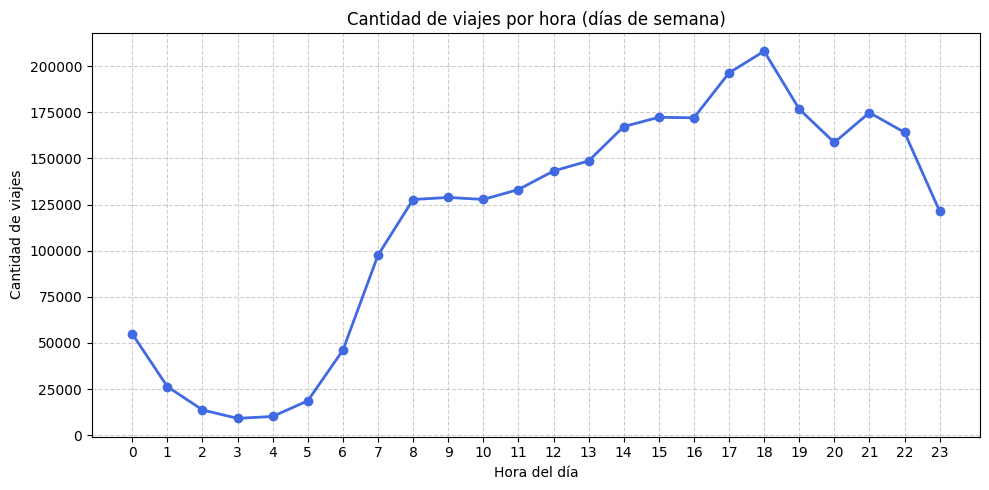

In [92]:

trips["tpep_pickup_datetime"] = pd.to_datetime(trips["tpep_pickup_datetime"])
trips["tpep_dropoff_datetime"] = pd.to_datetime(trips["tpep_dropoff_datetime"])

# Filtrar solo días de semana
trips = trips[trips["tpep_pickup_datetime"].dt.dayofweek < 5]

# Extraer la hora
trips["pickup_hour"] = trips["tpep_pickup_datetime"].dt.hour

# Agrupar por hora (sumando todos los PULocationID)
resumen = trips.groupby("pickup_hour").size().reset_index(name="num_viajes")

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(resumen["pickup_hour"], resumen["num_viajes"], marker="o", color="royalblue", linewidth=2)
plt.title("Cantidad de viajes por hora (días de semana)")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de viajes")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(range(0, 24))  # Mostrar todas las horas
plt.tight_layout()
plt.show()

Viendo este gráfico, se descubre visualmente que el mejor horario para ir a recoger pasajeros es entre las 4 y las 9 p.m pero se concentran principalmente entre las 6 a 7 p.m.

usando el mismo chat se dio este promp a chatgpt ("ahora haz un codigo que imprima las 10 mejores locaciones (Pulocation) Y la hora de esta misma")

In [96]:
import pandas as pd

# Convertir fechas
trips["tpep_pickup_datetime"] = pd.to_datetime(trips["tpep_pickup_datetime"])
trips["tpep_dropoff_datetime"] = pd.to_datetime(trips["tpep_dropoff_datetime"])

# Filtrar solo días de semana
trips = trips[trips["tpep_pickup_datetime"].dt.dayofweek < 5]

# Extraer la hora
trips["pickup_hour"] = trips["tpep_pickup_datetime"].dt.hour

# Agrupar por hora y PULocationID
resumen = trips.groupby(["pickup_hour", "PULocationID"]).size().reset_index(name="num_viajes")

# Ordenar de mayor a menor
resumen = resumen.sort_values(by="num_viajes", ascending=False).reset_index(drop=True)

# Mostrar el top 10
top_10 = resumen.head(10)

print("Top 10 mejores combinaciones (Hora + PULocationID):")
print(top_10)


Top 10 mejores combinaciones (Hora + PULocationID):
   pickup_hour  PULocationID  num_viajes
0           18           161       12806
1           17           161       12067
2           18           237       11845
3           17           237       11607
4           15           236       11563
5           14           237       11313
6           19           161       11185
7           15           237       11157
8           18           236       10716
9           16           237       10605


De aquí se puede extraer también que la mejor locación es la 161 y las mejores horas son entre las 17 y las 18 horas. Además, la locación 237 también es concurrida y, por lo general, las mejores horas para recoger gente son entre las 5 y las 7 p.m.



## 5. Estudio de datos de enfermos COVID

El primer paso es importar los datos estructurados del CSV. Para ello, podemos usar una librería de NumPy que permite importar datos en formato CSV directamente.

### 5.1 `numpy`: np.loadtxt() y np.genfromtxt()

Numpy provee funciones para leer archivos de texto estructurado directamente como arreglos (`np.ndarray`). 

En primer lugar la función `np.loadtxt()`, permite cargar archivos cuyo contenido es solamente numérico. Generalmente trabajaremos con datasets que tienen distintos tipos de datos en distintas columnas; por ejemplo, strings y floats. En este caso, es necesario utilizar la función `np.genfromtxt()`, que puede manejar este tipo de datos. Si usamos como argumento `dtype=None`, la función infiere el tipo de datos de cada columna en forma automática.

La documentación de ambas funciones se encuentra en: <br>
- https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html
- https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html

In [72]:
# nombre del archivo a leer
data_file='Covid-19.csv'

In [73]:
# cargar el archivo
data = np.loadtxt(data_file, delimiter=',',dtype='str')#skiprows=1

# Algunas formas de explorar los datos:
print(data[1])
#print(data.shape)
#print(data)

['Arica y Parinacota' '15' 'Arica' '15101' '247552.0' '6.0' '6.0' '12.0'
 '41.0' '63.0' '87.0' '115.0' '124.0' '134.0' '166.0' '224.0' '270.0'
 '297.0' '310.0' '328.0' '353.0' '371.0' '405.0' '477.0' '525.0' '596.0'
 '653.0' '806.0' '904.0' '1046.0' '1176.0' '1371.0' '1533.0' '1758.0'
 '1887.0' '2139.0' '2464.0' '2721.0' '3123.0' '3372.0' '3882.0' '4211.0'
 '4636.0' '4874.0' '5220.0' '5543.0' '5907.0' '6131.0' '6374.0' '6577.0'
 '6783.0' '6969.0' '7172.0' '7344.0' '7503.0' '7646.0' '7819.0' '7948.0'
 '8134.0' '8332.0' '8597.0' '8772.0' '8996.0' '9138.0' '9343.0' '9472.0'
 '9679.0' '9763.0' '9888.0' '9974.0' '10103.0' '10208.0' '10294.0'
 '10363.0' '10443.0' '10489.0' '10530.0' '10586.0' '10630.0' '10672.0'
 '10720.0' '10798.0' '10875.0' '10934.0' '11028.0' '11080.0' '11212.0'
 '11296.0' '11434.0' '11650.0' '11886.0' '12171.0' '12453.0' '12711.0'
 '13047.0' '13335.0' '13606.0' '13885.0' '14168.0' '14427.0' '14734.0'
 '15007.0' '15358.0' '15627.0' '15978.0' '16253.0' '16614.0' '16913.0'


In [74]:
# Importar data como floats y saltar la primera fila: data_float
data = np.genfromtxt(data_file, delimiter=',', dtype=None, skip_header=1, encoding=None)

print(data[0])
print(data.shape)

#numpy se las puede arreglar con datos mezclados pero es mejor pandas

('Arica y Parinacota', 15, 'Arica', 15101, 247552.0, 6.0, 6.0, 12.0, 41.0, 63.0, 87.0, 115.0, 124.0, 134.0, 166.0, 224.0, 270.0, 297.0, 310.0, 328.0, 353.0, 371.0, 405.0, 477.0, 525.0, 596.0, 653.0, 806.0, 904.0, 1046.0, 1176.0, 1371.0, 1533.0, 1758.0, 1887.0, 2139.0, 2464.0, 2721.0, 3123.0, 3372.0, 3882.0, 4211.0, 4636.0, 4874.0, 5220.0, 5543.0, 5907.0, 6131.0, 6374.0, 6577.0, 6783.0, 6969.0, 7172.0, 7344.0, 7503.0, 7646.0, 7819.0, 7948.0, 8134.0, 8332.0, 8597.0, 8772.0, 8996.0, 9138.0, 9343.0, 9472.0, 9679.0, 9763.0, 9888.0, 9974.0, 10103.0, 10208.0, 10294.0, 10363.0, 10443.0, 10489.0, 10530.0, 10586.0, 10630.0, 10672.0, 10720.0, 10798.0, 10875.0, 10934.0, 11028.0, 11080.0, 11212.0, 11296.0, 11434.0, 11650.0, 11886.0, 12171.0, 12453.0, 12711.0, 13047.0, 13335.0, 13606.0, 13885.0, 14168.0, 14427.0, 14734.0, 15007.0, 15358.0, 15627.0, 15978.0, 16253.0, 16614.0, 16913.0, 17431.0, 17771.0, 18370.0, 18637.0, 19157.0, 19396.0, 19845.0, 20142.0, 20550.0, 20894.0, 21325.0, 21692.0, 22130.0, 

En general, `numpy` hace un buen trabajo identificando los tipos en conjuntos de datos con tipos mezclados, pero la librería natural para trabajar con datos estructurados es `pandas`.

### 5.2 `pandas`: read_csv para pasar a DataFrame

La función `pd.read_csv()` permite leer un archivo de texto en formato CSV (comma separated value) y generar un DataFrame.
El delimitador por defecto es la coma (,), pero también pueden leerse datasets con otros tipos de separación, especificando el parámetro `delimiter`.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [75]:
# leer los datos
data = pd.read_csv(data_file, delimiter=',')
data.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,30-03-2020,01-04-2020,03-04-2020,06-04-2020,08-04-2020,...,09-12-2022,12-12-2022,16-12-2022,19-12-2022,23-12-2022,26-12-2022,30-12-2022,05-01-2023,09-01-2023,Tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,79891.0,80139.0,80584.0,80924.0,81364.0,81713.0,82516.0,82960.0,83092.0,33512.2
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,205.0,207.0,207.0,208.0,212.0,213.0,215.0,216.0,216.0,17518.2
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,116.0,116.0,116.0,116.0,117.0,118.0,119.0,122.0,123.0,15061.7
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,550.0,550.0,553.0,558.0,561.0,568.0,586.0,593.0,595.0,23578.5
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,228.0,228.0,228.0,228.0,228.0,228.0,228.0,228.0,228.0,NaN


In [76]:
data.columns

Index(['Region', 'Codigo region', 'Comuna', 'Codigo comuna', 'Poblacion',
       '30-03-2020', '01-04-2020', '03-04-2020', '06-04-2020', '08-04-2020',
       ...
       '09-12-2022', '12-12-2022', '16-12-2022', '19-12-2022', '23-12-2022',
       '26-12-2022', '30-12-2022', '05-01-2023', '09-01-2023', 'Tasa'],
      dtype='object', length=295)

In [77]:
type(data['Region'])

pandas.core.series.Series

In [78]:
data.tail(5)

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,30-03-2020,01-04-2020,03-04-2020,06-04-2020,08-04-2020,...,09-12-2022,12-12-2022,16-12-2022,19-12-2022,23-12-2022,26-12-2022,30-12-2022,05-01-2023,09-01-2023,Tasa
357,Magallanes,12,Rio Verde,12103.0,211.0,0.0,0.0,0.0,0.0,0.0,...,47.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,23696.7
358,Magallanes,12,San Gregorio,12104.0,681.0,0.0,0.0,0.0,0.0,0.0,...,145.0,145.0,145.0,145.0,145.0,145.0,146.0,146.0,146.0,21439.1
359,Magallanes,12,Timaukel,12303.0,282.0,0.0,0.0,0.0,0.0,0.0,...,54.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,19503.5
360,Magallanes,12,Torres del Paine,12402.0,1021.0,0.0,0.0,0.0,0.0,0.0,...,117.0,117.0,117.0,117.0,118.0,118.0,119.0,119.0,120.0,11655.2
361,Magallanes,12,Desconocido Magallanes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,NaN


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Columns: 295 entries, Region to Tasa
dtypes: float64(292), int64(1), object(2)
memory usage: 834.4+ KB


### 5.2 Índices y acceso a información de celdas

Al igual que en el caso de NYC, podemos acceder a datos específicos de la base en forma simple.

In [80]:
# resumen de datos por comuna para un día en particular
datos_resumen = data[['Comuna','26-12-2022']]
datos_resumen

,Comuna,26-12-2022
0,Arica,81713.0
1,Camarones,213.0
2,General Lagos,118.0
3,Putre,568.0
4,Desconocido Arica y Parinacota,228.0
...,...,...
357,Rio Verde,50.0
358,San Gregorio,145.0
359,Timaukel,55.0
360,Torres del Paine,118.0


In [81]:
# Columna de un día en particular
data['26-12-2022']

0      81713.0
1        213.0
2        118.0
3        568.0
4        228.0
        ...   
357       50.0
358      145.0
359       55.0
360      118.0
361       58.0
Name: 26-12-2022, Length: 362, dtype: float64

In [82]:
# nombre de las comunas
data['Comuna']

0                               Arica
1                           Camarones
2                       General Lagos
3                               Putre
4      Desconocido Arica y Parinacota
                    ...              
357                         Rio Verde
358                      San Gregorio
359                          Timaukel
360                  Torres del Paine
361            Desconocido Magallanes
Name: Comuna, Length: 362, dtype: object

In [83]:
# filtrar los datos para una comuna en particular
data_macul = data[data['Comuna']=='Macul']
data_macul

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,30-03-2020,01-04-2020,03-04-2020,06-04-2020,08-04-2020,...,09-12-2022,12-12-2022,16-12-2022,19-12-2022,23-12-2022,26-12-2022,30-12-2022,05-01-2023,09-01-2023,Tasa
112,Metropolitana,13,Macul,13118.0,134635.0,10.0,15.0,23.0,34.0,37.0,...,34953.0,34979.0,35021.0,35056.0,35121.0,35175.0,35282.0,35352.0,35407.0,26257.7


In [84]:
# identificar las fechas disponibles
columnas = data.columns[5:-1]
columnas

Index(['30-03-2020', '01-04-2020', '03-04-2020', '06-04-2020', '08-04-2020',
       '10-04-2020', '13-04-2020', '15-04-2020', '17-04-2020', '20-04-2020',
       ...
       '05-12-2022', '09-12-2022', '12-12-2022', '16-12-2022', '19-12-2022',
       '23-12-2022', '26-12-2022', '30-12-2022', '05-01-2023', '09-01-2023'],
      dtype='object', length=289)

In [85]:
# sólo los datos de las columnas con fecha
datos_enfermos = data[columnas]
datos_enfermos

,30-03-2020,01-04-2020,03-04-2020,06-04-2020,08-04-2020,10-04-2020,13-04-2020,15-04-2020,17-04-2020,20-04-2020,...,05-12-2022,09-12-2022,12-12-2022,16-12-2022,19-12-2022,23-12-2022,26-12-2022,30-12-2022,05-01-2023,09-01-2023
0,6.0,6.0,12.0,41.0,63.0,87.0,115.0,124.0,134.0,166.0,...,79564.0,79891.0,80139.0,80584.0,80924.0,81364.0,81713.0,82516.0,82960.0,83092.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,203.0,205.0,207.0,207.0,208.0,212.0,213.0,215.0,216.0,216.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,116.0,116.0,116.0,116.0,116.0,117.0,118.0,119.0,122.0,123.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,546.0,550.0,550.0,553.0,558.0,561.0,568.0,586.0,593.0,595.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,228.0,228.0,228.0,228.0,228.0,228.0,228.0,228.0,228.0,228.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,47.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,145.0,145.0,145.0,145.0,145.0,145.0,145.0,146.0,146.0,146.0
359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.0,54.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0
360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,117.0,117.0,117.0,117.0,117.0,118.0,118.0,119.0,119.0,120.0


In [86]:
# información estadística por cada columna
data.describe()

,Codigo region,Codigo comuna,Poblacion,30-03-2020,01-04-2020,03-04-2020,06-04-2020,08-04-2020,10-04-2020,13-04-2020,...,09-12-2022,12-12-2022,16-12-2022,19-12-2022,23-12-2022,26-12-2022,30-12-2022,05-01-2023,09-01-2023,Tasa
count,362.000000,346.000000,346.000000,343.000000,346.000000,346.00000,346.000000,346.000000,346.000000,346.000000,...,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,346.000000
mean,8.784530,9034.997110,56237.890173,5.647230,8.141618,10.15896,13.254335,15.300578,18.138728,21.621387,...,14660.276243,14682.265193,14722.917127,14750.063536,14794.397790,14824.825967,14893.223757,14950.646409,14980.279006,28302.559538
std,3.884479,3818.147431,88945.967089,19.022787,25.224560,31.03781,38.455380,42.803249,49.523508,56.388132,...,23574.851632,23610.441201,23677.836748,23722.864500,23799.280829,23852.772729,23968.456605,24060.781269,24106.878398,6893.720824
min,1.000000,1101.000000,137.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,13.000000,13.000000,13.000000,13.000000,12.000000,12.000000,12.000000,12.000000,12.000000,11655.200000
25%,6.000000,6109.250000,9649.250000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,2425.500000,2426.750000,2434.000000,2438.000000,2444.500000,2446.250000,2452.500000,2463.500000,2469.250000,23796.950000
50%,8.000000,8313.500000,19770.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.000000,...,5264.000000,5271.000000,5280.500000,5292.500000,5309.000000,5325.500000,5359.500000,5375.500000,5382.000000,27495.650000
75%,13.000000,13102.750000,55441.250000,0.000000,5.000000,6.75000,9.000000,11.000000,12.000000,14.000000,...,14297.250000,14326.250000,14379.000000,14404.250000,14453.500000,14496.250000,14559.500000,14612.250000,14651.500000,31508.475000
max,16.000000,16305.000000,645909.000000,181.000000,225.000000,293.00000,365.000000,407.000000,443.000000,471.000000,...,162080.000000,162230.000000,162592.000000,162826.000000,163218.000000,163510.000000,164147.000000,164710.000000,165038.000000,82230.000000


### 5.3 Operaciones con columnas

Cada columna de un DataFrame es una Serie, que corresponde a un arreglo 1-D con una etiqueta. Por lo tanto, en el caso de columnas con datos numéricos, podemos aplicar todas las operaciones matemáticas disponibles en `numpy`:

https://numpy.org/doc/stable/reference/routines.math.html

También podemos realizar operaciones entre 2 o más columnas, o entre columnas y escalares.


In [ ]:
# calcular la cantidad de casos por region
enfermos_por_region = data.groupby("Region").sum(numeric_only=True)
# mostrar sólo los datos de enfermos
enfermos_por_region[columnas]

,30-03-2020,01-04-2020,03-04-2020,06-04-2020,08-04-2020,10-04-2020,13-04-2020,15-04-2020,17-04-2020,20-04-2020,...,05-12-2022,09-12-2022,12-12-2022,16-12-2022,19-12-2022,23-12-2022,26-12-2022,30-12-2022,05-01-2023,09-01-2023
Region,,,,,,,,,,,,,,,,,,,,,
Antofagasta,29.0,32.0,49.0,65.0,72.0,105.0,149.0,176.0,211.0,264.0,...,179382.0,179971.0,180337.0,181071.0,181571.0,182388.0,182939.0,184209.0,185146.0,185590.0
Araucanía,187.0,292.0,414.0,541.0,628.0,680.0,758.0,823.0,884.0,1021.0,...,294386.0,294979.0,295304.0,295916.0,296341.0,296987.0,297406.0,298219.0,299044.0,299561.0
Arica y Parinacota,6.0,6.0,12.0,41.0,63.0,87.0,115.0,124.0,134.0,166.0,...,80657.0,80990.0,81240.0,81688.0,82034.0,82482.0,82840.0,83664.0,84119.0,84254.0
Atacama,0.0,0.0,4.0,4.0,5.0,12.0,13.0,13.0,13.0,14.0,...,109835.0,110435.0,110690.0,111168.0,111501.0,112084.0,112498.0,113408.0,114226.0,114683.0
Aysén,0.0,0.0,4.0,5.0,4.0,4.0,7.0,7.0,7.0,5.0,...,36155.0,36328.0,36388.0,36568.0,36648.0,36767.0,36819.0,36964.0,37133.0,37184.0
Biobío,72.0,224.0,263.0,360.0,409.0,439.0,507.0,542.0,573.0,627.0,...,526510.0,527807.0,528631.0,529911.0,530821.0,532293.0,533376.0,535644.0,537677.0,538679.0
Coquimbo,21.0,23.0,31.0,49.0,54.0,59.0,66.0,66.0,68.0,75.0,...,210698.0,211501.0,211943.0,212689.0,213224.0,214098.0,214644.0,215996.0,217250.0,217927.0
Los Lagos,104.0,169.0,198.0,250.0,283.0,304.0,380.0,390.0,412.0,431.0,...,249769.0,250446.0,250759.0,251349.0,251716.0,252281.0,252625.0,253318.0,253817.0,254080.0
Los Ríos,12.0,54.0,57.0,98.0,108.0,118.0,137.0,150.0,154.0,156.0,...,147753.0,148263.0,148542.0,149076.0,149375.0,149899.0,150156.0,150837.0,151359.0,151610.0


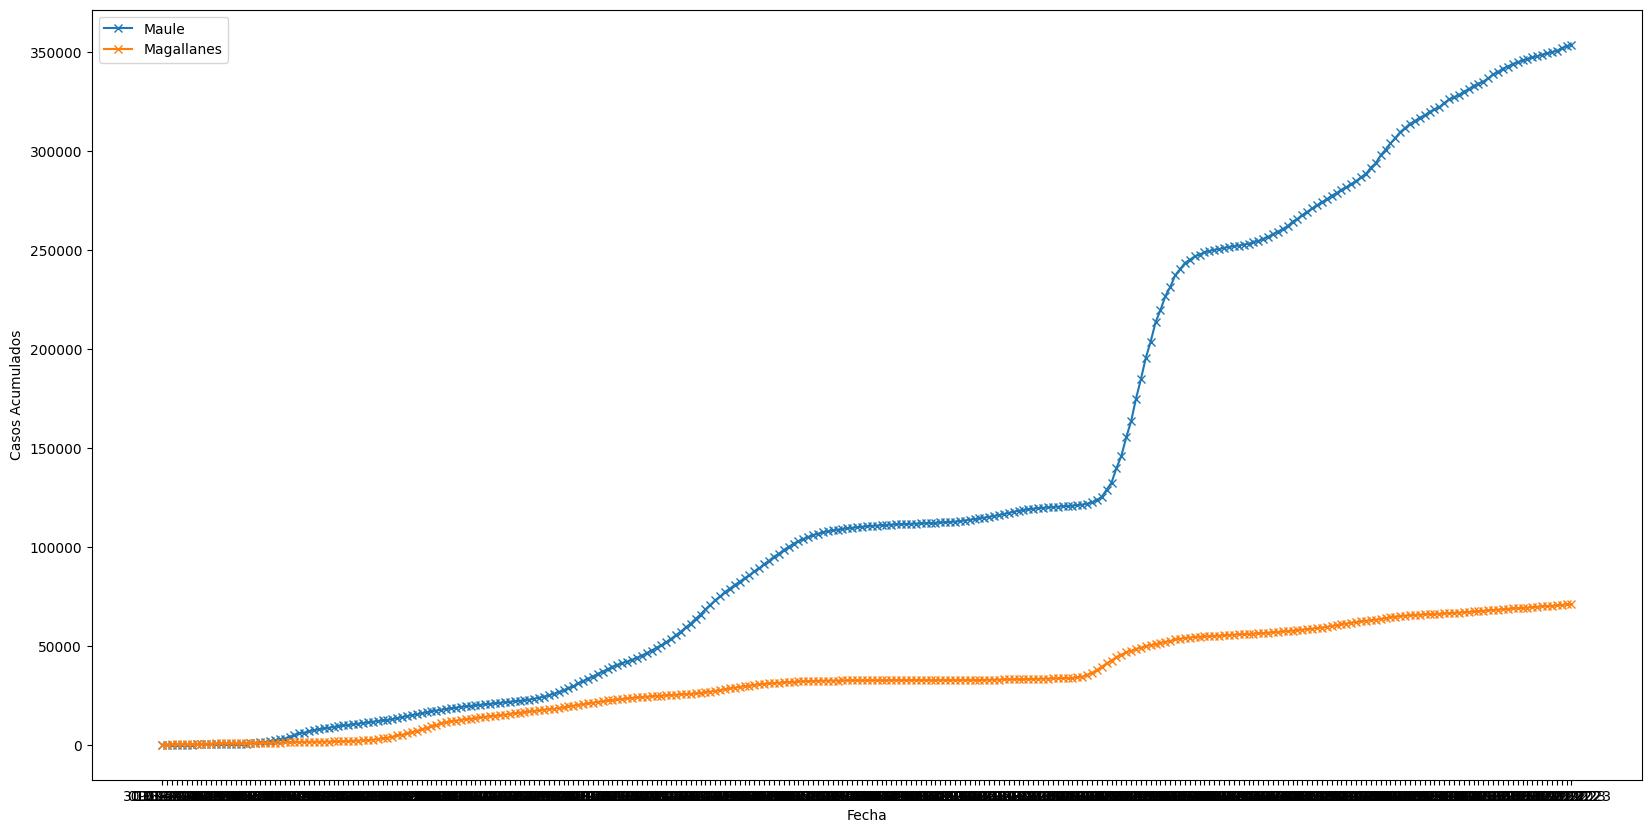

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.plot(enfermos_por_region.loc['Maule'][columnas], 'x-', label='Maule')
plt.plot(enfermos_por_region.loc['Magallanes'][columnas], 'x-', label='Magallanes')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Casos Acumulados')
plt.show()

<div class="alert alert-block alert-info">

### 5.4 Puntaje de premio
<b> Desafío:</b> Con esto, ¿Cómo podríamos calcular en qué fecha fue el mayor aumento de casos en cada Región? 

<b>Los tres primeros estudiantes que manden a nuestro correo el Jupyter Notebook con el código implementado para contestar esta pregunta tendrán 0.1 adicional en la Tarea 01. Debe venir la salida indicando la fecha, en cada región, con el mayor aumento de casos y el código de cómo lo lograron calcular.</b>
</div>